In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
#import requests

In [ ]:
import csv
names=[]
with open('/content/drive/My Drive/Colab Notebooks/DL/11/name1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
      a = row[0].lower().replace(' ','')
      if len(a) >= 3:
        names.append(a)
names

['surasak',
 'arom',
 'wiset',
 'dilok',
 'mongkut',
 'nopparat',
 'kwan',
 'tookta',
 'sakda',
 'pralop',
 'sakda',
 'sopida',
 'virote',
 'adisak',
 'kuanruthai',
 'songpob',
 'siriwan',
 'simok',
 'chirawan',
 'ampai',
 'chati',
 'vinai',
 'jureepron',
 'hirunrat',
 'thanomsin',
 'naiyana',
 'suwimol',
 'pornphat',
 'rapalada',
 'theerapat',
 'sirindhorn',
 'grasin',
 'nuanjan',
 'montri',
 'chalermchai',
 'bualan',
 'ladawan',
 'varongnard',
 'mathee',
 'samlee',
 'jetsadaporn',
 'sompop',
 'jirakorn',
 'wanida',
 'sittipong',
 'manat',
 'nath',
 'saengduan',
 'suraphee',
 'muhammad',
 'dokrak',
 'suchart',
 'suphan',
 'anchalee',
 'vichein',
 'nattapon',
 'aphinat',
 'lumpung',
 'choy',
 'piangpatu',
 'montha',
 'saipin',
 'sathit',
 'saifon',
 'wachari',
 'nittaya',
 'kamalakorn',
 'jampee',
 'sireethorn',
 'sathok',
 'anek',
 'nuntida',
 'dokrak',
 'suphang',
 'traiyarat',
 'kimhan',
 'theeranop',
 'kwanchai',
 'chanthara',
 'chaiwat',
 'danai',
 'piyawan',
 'omchai',
 'dawngjai

In [ ]:
len(names)

8270

In [ ]:
names_duplicates = list(map(lambda s: s.split('-')[0], names))
len(names_duplicates)

8270

In [ ]:
#names_duplicates

In [ ]:
names = list(set(names_duplicates))
len(names)

5063

In [ ]:
names = list(map(lambda s: '+' + s + '.', names))
#names[:10]

In [ ]:
# Convert from character to index
char_to_index = dict( (chr(i+96), i) for i in range(1,27))
char_to_index[' '] = 0
char_to_index['.'] = 27

# Convert from index to character
index_to_char = dict( (i, chr(i+96)) for i in range(1,27))
index_to_char[0] = ' '
index_to_char[27] = '.'

In [ ]:
# maximum number of characters 
max_char = len(max(names, key=len))

# number of elements in the list of names
m = len(names)

# number of potential characters
char_dim = len(char_to_index)

In [ ]:
X = np.zeros((m, max_char, char_dim))
Y = np.zeros((m, max_char, char_dim))

for i in range(m):
    name = list(names[i])
    #print(name)
    for j in range(len(name)):
      try:
        X[i, j, char_to_index[name[j]]] = 1
        if j < len(name)-1:
            #print(name[j+1]," -> ",char_to_index[name[j+1]])
            Y[i, j, char_to_index[name[j+1]]] = 1
      except:
         pass
        

# LSTM

In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, TimeDistributed
from tensorflow. keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LambdaCallback


In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(max_char, char_dim), return_sequences=True))
model.add(Dense(char_dim, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
def make_name(model):
    name = []
    x = np.zeros((1, max_char, char_dim))
    end = False
    i = 0
    
    while end==False:
        probs = list(model.predict(x)[0,i])
        probs = probs / np.sum(probs)
        index = np.random.choice(range(char_dim), p=probs)
        if i == max_char-2:
            character = '.'
            end = True
        else:
            character = index_to_char[index]
        name.append(character)
        x[0, i+1, index] = 1
        i += 1
        if character == '.':
            end = True
    
    print(''.join(name))

In [ ]:
def generate_name_loop(epoch, _):
    if epoch % 25 == 0:
        
        print('Names generated after epoch %d:' % epoch)

        for i in range(10):
            make_name(model)
        
        print()

In [ ]:
name_generator = LambdaCallback(on_epoch_end = generate_name_loop)

In [ ]:
hist = model.fit(X, Y, batch_size=64, epochs=700, callbacks=[name_generator], verbose=0)

Names generated after epoch 0:
opgvthrn.
pntyjdena.
liaarkin.
ezea.
hmzttero.
qnifain.
xwatcr.
oeotpat.
fqdtnol.
crolra.

Names generated after epoch 25:
manuchan.
chanwaeporn.
siritchin.
baisrn.
deerasuk.
theerasakra.
echiyorn.
luanchee.
fup.
rucherp.

Names generated after epoch 50:
omnat.
enapun.
dwan.
imarayakurn.
unya.
unaphan.
untharee.
haili.
eekichan.
isri.

Names generated after epoch 75:
dilacmaat.
ruem.
sangije.
uboom.
darika.
suphaporn.
rungtip.
ongil.
utthasri.
chanyabos.

Names generated after epoch 100:
upaporn.
oranich.
unpon.
pimon.
onanochua.
benja.
irut.
uapporn.
aittipat.
harusai.

Names generated after epoch 125:
unchalee.
.
omaoung.
athaos.
xuwicha.
ekachai.
veerasit.
ekchai.
ukrin.
nipon.

Names generated after epoch 150:
urairat.
aseka.
onnari.
ittipol.
issarin.
oranat.
ujirade.
qassana.
ruatjai.
ampan.

Names generated after epoch 175:
buppakorn.
duangmanue.
hathai.
ekachai.
kusanan.
jittree.
waratthaya.
onchiree.
hatrai.
chatsri.

Names generated after epoch 2

In [ ]:
for i in range(50):
    make_name(model)

udon.
manurom.
eksuwat.
issarin.
anusit.
kanyamon.
lamyai.
unruan.
hathairat.
.
ounraun.
hirunrat.
orrapun.
vatcharapol.
fung.
varinporn.
hapusoh.
hainad.
zorrakhai.
heksaphorn.
anotai.
wirasak.
duangjai.
hataisorn.
orrapun.
sarai.
areva.
dangrop.
orranuch.
sorrapong.
ekkarad.
udrunn.
raddal.
hataiporn.
rachanee.
arthid.
rakre.
ongard.
hairit.
achariya.
arunwan.
itthiwat.
amnuy.
athasit.
lukkana.
ittiporn.
malivalaya.
richawee.
aphimuk.
jirayu.


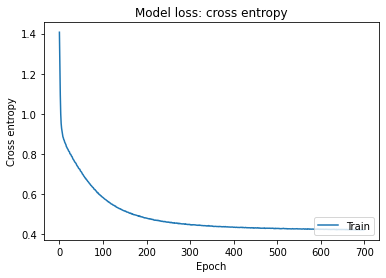

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline                
 
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.title('Model loss: cross entropy')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()